必要なライブラリを読み込む

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

分かち書きされたテキストを読み込み

In [2]:
f = open('analysis_text.txt')
text = f.read()
f.close()
print(text)

自宅 ネットワーク 最近 2017 年 12 月 家 ネットワーク 妻 同様 不満 間違い よう ネットワーク 不調 引越し 早々 今回 2 度目 前回 同様 サイト スピード 測定 ------ BNR スピード テスト 測定 サイト Ver 5 . 6001 測定 日時 2017 / 12 / 16 11 : 43 : 00 回線 / ISP / 地域 -------------------------------------------------- 1 . NTTPC 2 . NTTPC 推定 転送 速度 337 . 25 Kbps 私 ネットワーク 以前 不具合 解消 とき 測定 140 Mbps 100 倍 以上 メロス 風 上記 記事 引用 ）> 激怒 ネットワーク 不具合 決意 ネットワーク 食べ物 ネット サーフィン RaspberryPi ネットワーク 接続 人一倍 敏感 怒り あまり 頭 トー そう ネットワーク 不具合 調査 ネットワーク 問題 原因 調査 ネットワーク 異常 個所 推測 ネットワーク 原因 調査 ネットワーク 素人 現状 把握 ため 我が家 ネットワーク 構成 図 頭 感じ ネットワーク 構成 図 サーバ ルーム マンション 戸棚 一角 様 感じ スペース 写真 NEC ルータ SynologyNAS 記事 参照 下 い ら 最高 最初 スピード 測定 ネットワーク 構成 図 左下 ネットワーク 機器 類 ところ 位置 PC iMac ハブ ルータ 問題 可能 性 インターネット 以外 通信 ら 問題 ネットワーク 管理 会社 宅 機器 問題 メガネ クイッ 否定 可能 性 メガネ 野郎 私 メガネ 調査 根元 幹線 LAN 幹線 LAN 有線 LAN PC 必要 iMac サーバ ルーム 大変 愛用 MacBook ステッカー ペタペタ オタク 仕様 無線 インターフェス とき 目 RaspberryPi 我々 人類 RaspberryPi 幸い 最近 小型 ディスプレイ 単体 ネットワーク 速度 測定 うってつけ わけ RaspberryPi ネットワーク 速度 測定 RaspberryPi ネットワーク 速度 測定 準備 RaspberryPi ディスプレイ 下記 記事 要領 セット アップ 測定 使用 Raspber

WordCloudで可視化

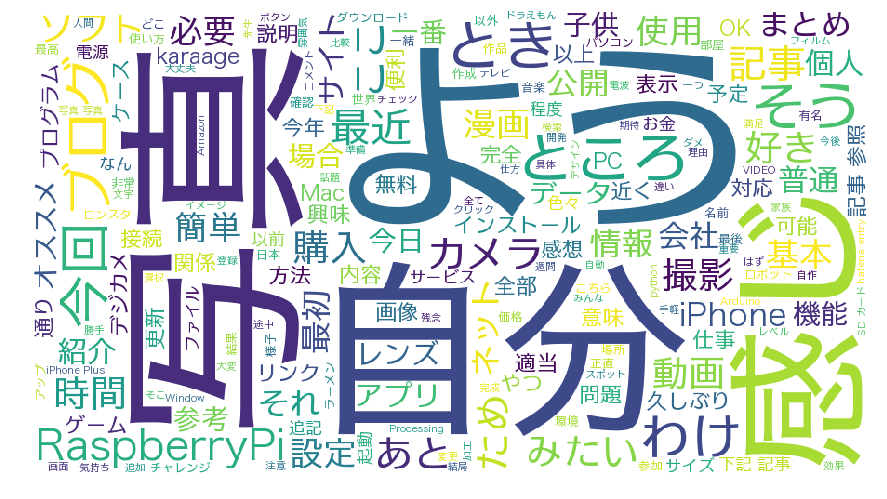

In [3]:
fpath = "~/System/Library/Fonts/AquaKana.ttc"
wordcloud = WordCloud(background_color="white", font_path=fpath, width=900, height=500).generate(text)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

word2vecを使って単語をベクトル化する

In [4]:
from gensim.models import word2vec
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO) # 今どれくらい処理が進んでるか確認する用
sentences = word2vec.LineSentence('analysis_text.txt')
model = word2vec.Word2Vec(sentences,
                          sg=1,         #0: CBOW, 1: skip-gram
                          size=300,     # ベクトルの次元数
                          window=5,    # 入力単語からの最大距離
                          min_count=5,  # 単語の出現回数でフィルタリング
                          )

model.save("./word2vec.model")

2018-02-08 00:32:53,627 : INFO : collecting all words and their counts
2018-02-08 00:32:53,658 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-02-08 00:32:53,715 : INFO : collected 19034 word types from a corpus of 219973 raw words and 22 sentences
2018-02-08 00:32:53,716 : INFO : Loading a fresh vocabulary
2018-02-08 00:32:53,738 : INFO : min_count=5 retains 5427 unique words (28% of original 19034, drops 13607)
2018-02-08 00:32:53,739 : INFO : min_count=5 leaves 197471 word corpus (89% of original 219973, drops 22502)
2018-02-08 00:32:53,769 : INFO : deleting the raw counts dictionary of 19034 items
2018-02-08 00:32:53,771 : INFO : sample=0.001 downsamples 45 most-common words
2018-02-08 00:32:53,772 : INFO : downsampling leaves estimated 180060 word corpus (91.2% of prior 197471)
2018-02-08 00:32:53,790 : INFO : estimated required memory for 5427 words and 300 dimensions: 15738300 bytes
2018-02-08 00:32:53,791 : INFO : resetting layer weights
2018-02-

EmbeddingProjectorの入力フォーマットに合わせてファイル出力

In [5]:
with open('vector.tsv', 'w', encoding='utf-8') as f, \
     open('metadata.tsv', 'w', encoding='utf-8') as g:

    # metadata file needs header
    # g.write('Word\n')

    for word in model.wv.vocab.keys():
        embedding = model.wv[word]

        # Save vector TSV file
        f.write('\t'.join([('%f' % x) for x in embedding]) + '\n')

        # Save metadata TSV file
        g.write(word + '\n')

print("file is saved")

file is saved
